In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# 데이터 다운로드

In [ ]:
data_path = './data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')

# 유저들의 유입 시기에 대한 분석

In [ ]:
### 유저들이 많이 유입된 시기
time_changer= lambda x: time.strftime('%Y-%m', time.localtime(x))
# 유저들이 맨처음 시청한 기록의 데이터만 추출
time_df= train_df.drop_duplicates('user', keep='first')
time_df['time']= time_df['time'].apply(time_changer)


/tmp/ipykernel_40455/109802462.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_df['time']= time_df['time'].apply(time_changer)


Text(42, 731, '2008-10\n731')

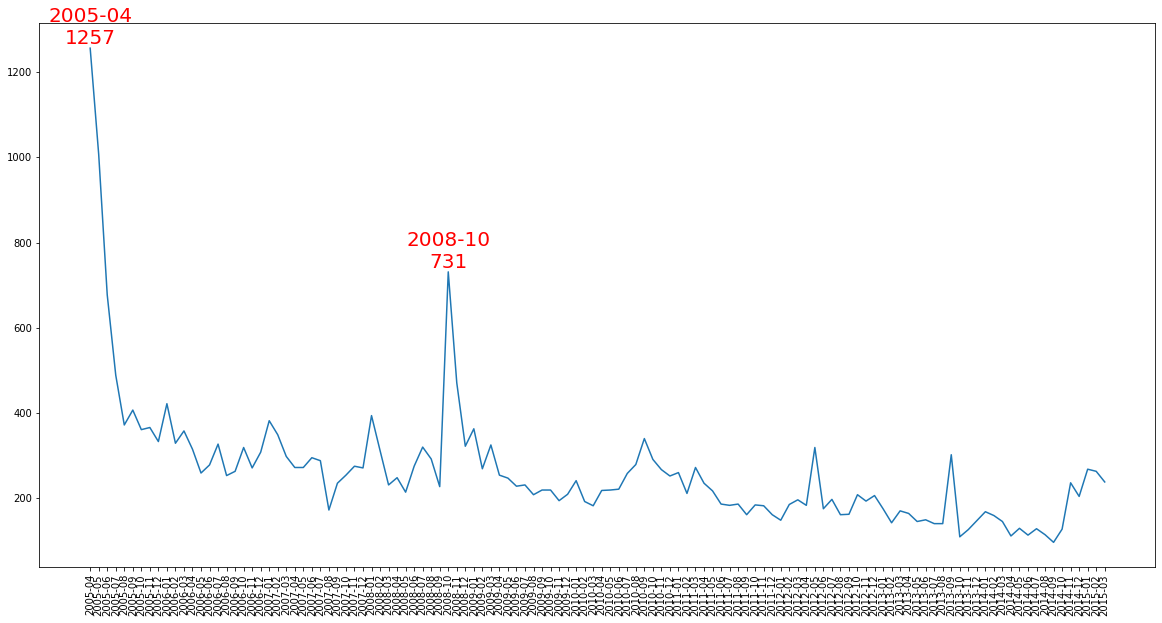

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
temp=time_df.groupby('time')['user'].count()

ax= plt.plot(temp)
# 최대값 표시
plt.text(temp.argmax() ,max(temp),
        temp.index[temp.argmax()] + '\n' + str(temp[temp.argmax()]),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom',
         fontsize= 20
         )
# 2번째
plt.text(42 ,max(temp[temp.index>='2008-01']),
        temp.index[42] + '\n' + str(max(temp[temp.index>='2008-01'])),
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom',
         fontsize= 20
         )


In [ ]:
temp.values

array([1257, 1007,  677,  488,  371,  406,  360,  365,  332,  421,  328,
        357,  314,  258,  277,  326,  252,  262,  318,  270,  307,  381,
        348,  297,  271,  271,  294,  287,  171,  234,  253,  274,  270,
        393,  311,  230,  247,  213,  274,  319,  291,  226,  731,  470,
        321,  362,  268,  324,  253,  246,  227,  230,  207,  218,  218,
        193,  208,  240,  191,  181,  217,  218,  220,  257,  278,  339,
        290,  266,  251,  259,  210,  271,  234,  216,  185,  182,  185,
        160,  183,  181,  160,  147,  184,  195,  182,  318,  174,  196,
        160,  161,  207,  192,  205,  174,  141,  169,  163,  144,  148,
        139,  139,  301,  108,  125,  146,  167,  158,  144,  110,  128,
        112,  127,  113,   95,  126,  235,  203,  267,  262,  237])

- 서비스 초기에 유입 유저들이 가장 많았습니다.
- 특이점은 서비스 론칭 첫날~셋째날 이후 200-400명대 유저수를 기록하다가 갑자기 2008년 10월 유입자수가 731명으로 증가한다는 것입니다.
- 이에 대한 원인을 분석해보고자합니다.

## 2008년 10월에 대한 추가 분석

In [ ]:
### 특정 영화를 보려고 들어왔나?
plt.figure(figsize=(10,10))
temp_2008= time_df[time_df['time']=='2008-10']
temp= temp_2008.groupby(by='item')['user'].count().sort_values(ascending=False)
temp[:20]

item
1215     17
1233     14
1639     13
2078     11
2420     10
1242     10
2076     10
2871      9
431       8
3107      8
1376      8
2908      7
2948      7
1625      7
48385     7
2947      7
471       7
2150      7
3252      7
2599      7
Name: user, dtype: int64

<Figure size 720x720 with 0 Axes>

In [ ]:
print(title_data[title_data['item']==1215])
print(title_data[title_data['item']==1233])
print(title_data[title_data['item']==1639])
print(title_data[title_data['item']==2078])
print(title_data[title_data['item']==2420])

      item                    title
3424  1215  Army of Darkness (1993)
     item                         title
292  1233  Boot, Das (Boat, The) (1981)
     item               title
343  1639  Chasing Amy (1997)
     item                    title
490  2078  Jungle Book, The (1967)
     item                   title
531  2420  Karate Kid, The (1984)


- Army of Darkness를 평가한 사람들이 많긴 하지만 특이하게 많은 수치는 아닙니다. 
- 그렇다면, 그날 처음 무비렌즈 사이트에 등장한 영화들에 대해 많은 사람들이 평가를 남긴걸까요? 다시 말해 2008년 10월에 무비렌즈에 처음 나온 영화가 많았던 걸까요?

In [ ]:
### 2008년 10월에 본 영화들에 대해 처음 평점이 매겨진 날이 언제였는지 알아보자
temp_df= pd.DataFrame(temp.index)
temp_df= pd.merge(temp_df, train_df, on='item', how='left')
temp_df

,item,user,time
0,1215,116,1132727926
1,1215,147,1161491456
2,1215,162,1385770826
3,1215,271,1225232797
4,1215,294,1289067588
...,...,...,...
552577,60069,138437,1284732256
552578,60069,138446,1358976919
552579,60069,138457,1264540113
552580,60069,138472,1267119238


In [ ]:
temp_df= temp_df.sort_values(by=['item','time'])
temp_df= temp_df.drop_duplicates(subset=['item'] ,keep='first')
temp_df['time']=temp_df['time'].apply(time_changer)

In [ ]:
temp_df.groupby('time')['time'].count()

time
2005-04    272
2005-05      2
2005-06      2
2005-07      1
2005-09      2
2006-05      1
2006-11      2
2006-12      2
2007-03      1
2007-04      1
2007-09      1
2008-06      1
2008-07      1
Name: time, dtype: int64

In [ ]:
temp_df= pd.merge(temp_df, temp_2008, on='item', how='left')
temp_df.groupby('time_x')['item'].count()

time_x
2005-04    705
2005-05      3
2005-06      2
2005-07      1
2005-09      2
2006-05      1
2006-11      8
2006-12      2
2007-03      2
2007-04      1
2007-09      1
2008-06      1
2008-07      2
Name: item, dtype: int64

- 2008년 10월에 평점매겨진 영화개수가 289인데 그 영화들 중 272개가 2005년 4월에 처음 평점이 매겨진 영화들입니다.
- 2008년 10월에 발생한 전체 interaction수가 731개인데 그중 705개의 interaction이 2005년 4월에 처음 평점이 매겨진 영화들에 대한 interaction입니다.
- 아마 어떠한 이벤트 등으로 인해 무비렌즈 로그 기록 첫날 평점 매겨진 영화들에 대해 2008년 10월에 새로운 유저들에 의해 재평가된 것으로 보입니다.